In [1]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading data
data=pd.read_csv('task_data.csv')


In [3]:
#Basic exploration
data.describe()


,ID,Cardiomegaly,Heart width,Lung width,xx,yy,xy,normalized_diff,Polygon Area Ratio,Heart area,Lung area
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,26.027027,0.756757,206.351351,413.810811,2286.269336,4730.006310,-805.167329,-0.344805,0.274054,34402.378378,81486.783784
std,15.039737,0.434959,29.283306,36.771696,638.801580,1095.268932,398.022620,0.145481,0.057254,6187.119516,14730.330918
min,1.000000,0.000000,148.000000,341.000000,1214.923424,3076.280456,-1755.344699,-0.651767,0.181388,22583.000000,51018.000000
25%,13.000000,1.000000,189.000000,396.000000,1833.841218,3969.359793,-995.735145,-0.432405,0.223339,29120.000000,70212.000000
50%,25.000000,1.000000,204.000000,407.000000,2197.853422,4812.389570,-831.472858,-0.360424,0.264131,33591.000000,83123.000000
75%,40.000000,1.000000,223.000000,432.000000,2465.903392,5376.834707,-638.531109,-0.284012,0.320787,39256.000000,92058.000000
max,50.000000,1.000000,266.000000,498.000000,3961.102462,8378.677729,211.472229,-0.031457,0.421824,46381.000000,116542.000000


In [4]:
data.head()

,ID,Cardiomegaly,Heart width,Lung width,CTR - Cardiothoracic Ratio,xx,yy,xy,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
0,1,0,172,405,"0,424691358",1682.360871,3153.671880,-638.531109,-0.304239,"68,8186",0.213446,"679,4873689",24898,75419
1,2,1,159,391,"0,4066496164",1526.660960,5102.159054,-889.678405,-0.539387,"73,92564",0.203652,"788,6589419",29851,94494
2,5,0,208,400,"0,52",2465.903392,5376.834707,-1755.344699,-0.371163,"69,33974",0.320787,"862,3229369",33653,66666
3,7,1,226,435,"0,5195402299",2509.063593,6129.821270,-1025.079806,-0.419123,"84,14868",0.317545,"906,724959",42018,82596
4,8,1,211,420,"0,5023809524",2368.770135,5441.767075,-1493.040062,-0.393442,"73,78347",0.263542,"864,2396777",35346,85631


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          37 non-null     int64  
 1   Cardiomegaly                37 non-null     int64  
 2   Heart width                 37 non-null     int64  
 3   Lung width                  37 non-null     int64  
 4   CTR - Cardiothoracic Ratio  37 non-null     object 
 5   xx                          37 non-null     float64
 6   yy                          37 non-null     float64
 7   xy                          37 non-null     float64
 8   normalized_diff             37 non-null     float64
 9   Inscribed circle radius     37 non-null     object 
 10  Polygon Area Ratio          37 non-null     float64
 11  Heart perimeter             37 non-null     object 
 12  Heart area                  37 non-null     int64  
 13  Lung area                   37 non-nu

In [6]:
#We can see that data has some problems to fix in cols 4,9 and 11. 
#Looking at the head it's obvious that the problem is , instead of . in data
wrong_cols=['CTR - Cardiothoracic Ratio','Inscribed circle radius','Heart perimeter']
for col in wrong_cols:
    data[col]=data[col].astype(str).str.replace(",",".")
    data[col]=data[col].astype(float)
#checking if fix is 
    


The proportion of outcomes is:
Cardiomegaly
1    0.756757
0    0.243243
Name: proportion, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

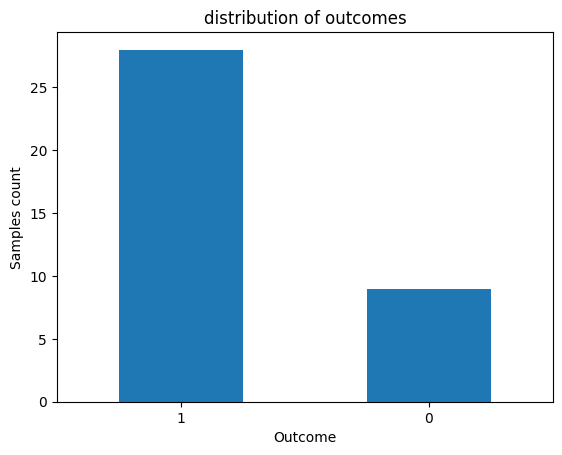

In [7]:
#Checking balance of classes to choose optimal training split
counts=data['Cardiomegaly'].value_counts()
print(f"The proportion of outcomes is:\n{data['Cardiomegaly'].value_counts(1)}")
counts.plot(kind='bar',title='distribution of outcomes',rot=0)
plt.xlabel("Outcome")
plt.ylabel("Samples count")
plt.show

In [9]:
#As we can conclude from the distribution, we should use approximately 80/20 train/test split to get fair results
